<a href="https://colab.research.google.com/github/SinghLavanya/Credit-Card-Prediction/blob/main/Mastercard_stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import numpy as np




In [3]:
# Load data
data = pd.read_csv('//content/Mastercard_stock_history.csv')

In [4]:
# Display the first few rows of the dataset
print(data.head())

# Check data types and any missing values
print(data.info())
print(data.describe())


         Date      Open      High       Low     Close     Volume  Dividends  \
0  2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000        0.0   
1  2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000        0.0   
2  2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000        0.0   
3  2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000        0.0   
4  2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volum

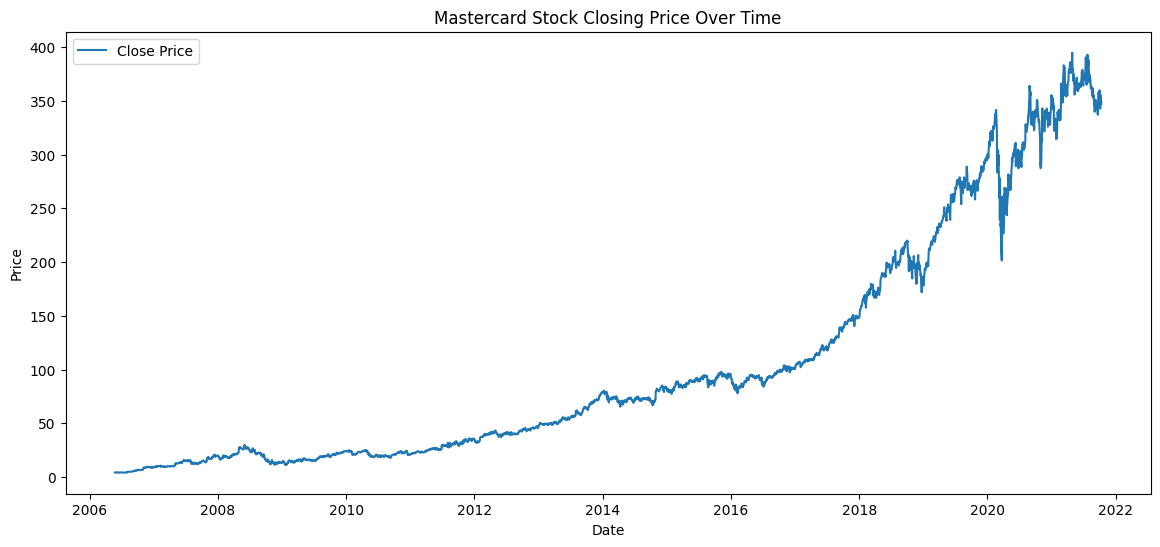

In [5]:
# Convert the Date column to datetime format if it's not already
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Mastercard Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [6]:
# Check for missing values
print(data.isnull().sum())

# Optionally, fill or interpolate missing values
data.fillna(method='ffill', inplace=True)


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


<ipython-input-6-d314973a2c46>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')

# Perform the test on the closing price
adf_test(data['Close'])


ADF Statistic: 1.2039258297952193
p-value: 0.9960128949994066
Critical Value 1%: -3.4320527513193335
Critical Value 5%: -2.862292382111522
Critical Value 10%: -2.5671705024562503


In [8]:
# Difference the data if non-stationary
data['Close_diff'] = data['Close'].diff().dropna()

# Re-run ADF test on differenced data
adf_test(data['Close_diff'].dropna())


ADF Statistic: -12.611999007853793
p-value: 1.6475458264328442e-23
Critical Value 1%: -3.4320527513193335
Critical Value 5%: -2.862292382111522
Critical Value 10%: -2.5671705024562503


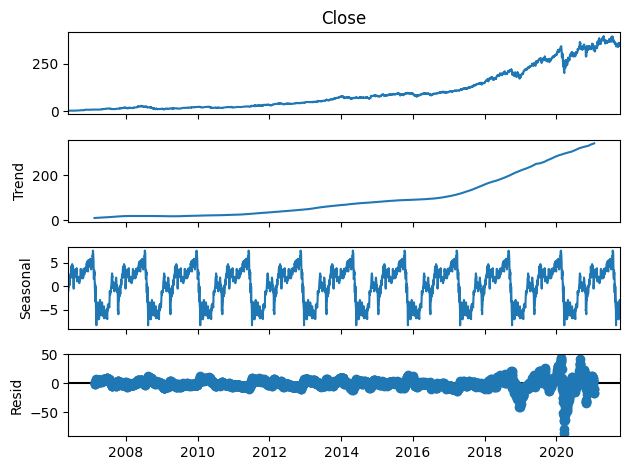

In [9]:
# Decompose the time series
decomposition = seasonal_decompose(data['Close'], model='additive', period=365)
decomposition.plot()
plt.show()


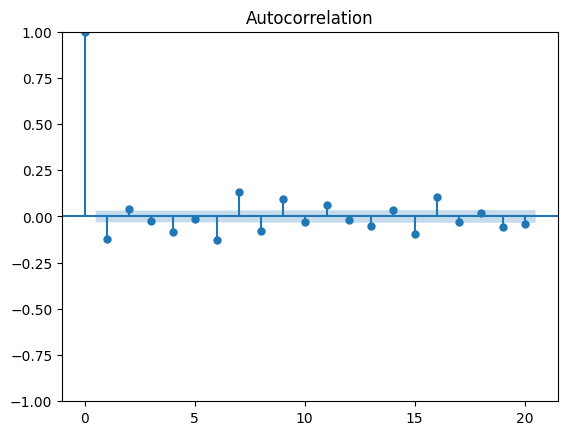

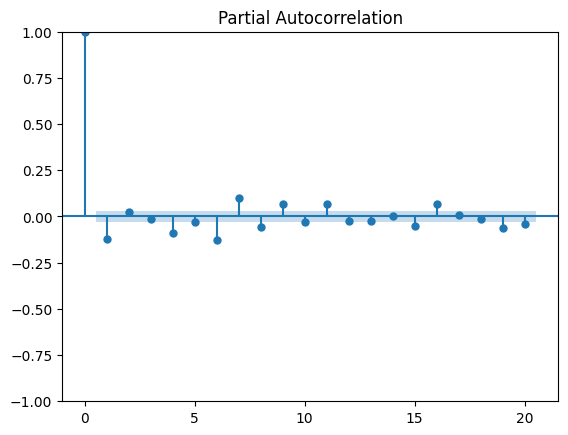

In [10]:
# Plot ACF and PACF to determine AR and MA terms
plot_acf(data['Close_diff'].dropna(), lags=20)
plt.show()

plot_pacf(data['Close_diff'].dropna(), lags=20)
plt.show()


In [11]:
# Build ARIMA model (p, d, q values are determined based on ACF and PACF)
model = ARIMA(data['Close'], order=(1, 1, 1))  # Replace with actual (p, d, q)
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3872
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9557.417
Date:                Fri, 08 Nov 2024   AIC                          19120.834
Time:                        08:24:34   BIC                          19139.618
Sample:                             0   HQIC                         19127.504
                               - 3872                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2953      0.037     -7.892      0.000      -0.369      -0.222
ma.L1          0.1780      0.038      4.625      0.000       0.103       0.253
sigma2         8.1666      0.047    175.445      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


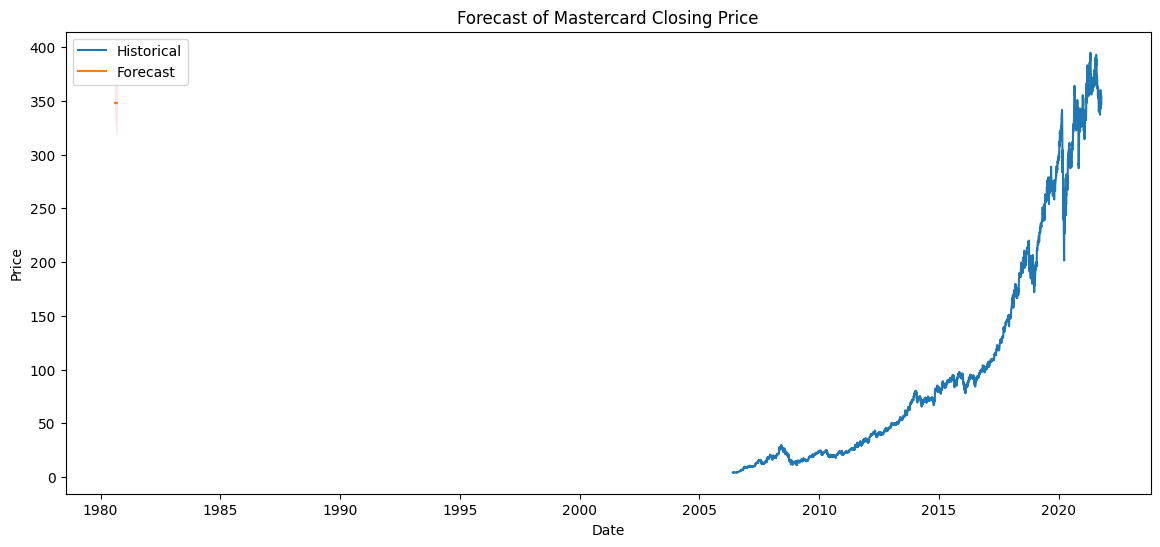

In [12]:
# Forecast the next steps
forecast = model_fit.get_forecast(steps=30)
forecast_ci = forecast.conf_int()

# Plot the forecast along with confidence intervals
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Historical')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast of Mastercard Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [13]:
# Evaluate the model using Mean Squared Error
actual = data['Close'].iloc[-30:]  # Adjust as needed
predictions = forecast.predicted_mean
mse = mean_squared_error(actual, predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 31.454897015863757
